In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import warnings
warnings.filterwarnings('ignore')

import torch
import linear_rep_geometry as lrg

device = torch.device("cuda:0")

concept_gamma = torch.load('matrices/concept_gamma.pt').to(device)
concept_g = torch.load('matrices/concept_g.pt').to(device)
sqrt_Cov_gamma = torch.load("matrices/sqrt_Cov_gamma.pt").to(device)
g = torch.load('matrices/g.pt').to(device)
W, d = g.shape

concept_names = []
with open('matrices/concept_names.txt', 'r') as f:
    for index, line in enumerate(f.readlines()):
        concept_names.append(f"{line.strip()} ({index +1})")


Loading checkpoint shards: 100%|██████████| 2/2 [00:23<00:00, 11.72s/it]


In [3]:
# matrices/concept_gamma.pt
print(concept_gamma.shape)
concept_gamma

torch.Size([27, 4096])


tensor([[ 0.0007,  0.0149,  0.0166,  ...,  0.0005, -0.0113, -0.0066],
        [-0.0010, -0.0060,  0.0130,  ..., -0.0111,  0.0381,  0.0038],
        [-0.0002,  0.0298,  0.0205,  ..., -0.0192,  0.0155, -0.0043],
        ...,
        [ 0.0038,  0.0147,  0.0114,  ..., -0.0002, -0.0106, -0.0039],
        [-0.0036, -0.0018, -0.0013,  ...,  0.0249,  0.0064,  0.0098],
        [-0.0215, -0.0115, -0.0081,  ..., -0.0030, -0.0255,  0.0041]],
       device='cuda:0')

In [4]:
# matrices/concept_g.pt
print(concept_g.shape)
concept_g

torch.Size([27, 4096])


tensor([[-0.0055,  0.0144,  0.0112,  ..., -0.0068, -0.0234, -0.0096],
        [-0.0066, -0.0091,  0.0097,  ..., -0.0112,  0.0381,  0.0076],
        [-0.0052,  0.0283,  0.0142,  ..., -0.0213,  0.0167, -0.0074],
        ...,
        [ 0.0074,  0.0171,  0.0071,  ...,  0.0002, -0.0121, -0.0015],
        [-0.0021, -0.0005, -0.0068,  ...,  0.0239,  0.0028,  0.0083],
        [-0.0279, -0.0143, -0.0023,  ..., -0.0073, -0.0243, -0.0029]],
       device='cuda:0')

In [5]:
# matrices/sqrt_Cov_gamma.pt
print(sqrt_Cov_gamma.shape)
sqrt_Cov_gamma

torch.Size([4096, 4096])


tensor([[ 1.6114e-02, -6.4688e-05,  9.9510e-05,  ...,  7.0130e-05,
          2.3376e-05, -8.3404e-06],
        [-6.4688e-05,  1.5952e-02, -8.6257e-05,  ..., -5.6213e-05,
          1.8292e-07, -4.1232e-05],
        [ 9.9510e-05, -8.6257e-05,  1.5829e-02,  ..., -2.5910e-05,
          4.7380e-05, -3.1547e-05],
        ...,
        [ 7.0130e-05, -5.6213e-05, -2.5910e-05,  ...,  1.6515e-02,
         -2.6960e-05,  9.3685e-05],
        [ 2.3376e-05,  1.8290e-07,  4.7380e-05,  ..., -2.6960e-05,
          1.5556e-02, -1.0739e-04],
        [-8.3404e-06, -4.1232e-05, -3.1547e-05,  ...,  9.3684e-05,
         -1.0739e-04,  1.7707e-02]], device='cuda:0')

In [6]:
print(g.shape)
g

torch.Size([32000, 4096])


tensor([[ 0.1251, -0.2941, -0.1777,  ...,  0.0623,  0.0170, -0.4608],
        [-1.1194,  1.9887,  0.0705,  ..., -1.4700,  2.2703,  0.6281],
        [-1.1231,  0.7729,  1.7594,  ..., -2.6730,  0.8834, -0.4264],
        ...,
        [-1.8651, -1.4565, -0.1221,  ...,  0.5645, -0.0761, -2.2476],
        [ 1.9556,  0.9917,  1.7593,  ...,  0.5505, -0.1753, -1.0072],
        [ 1.1734, -1.1121,  0.5380,  ..., -2.1610, -0.7749,  0.8948]],
       device='cuda:0')

In [7]:
print(len(concept_names))
concept_names

27


['$verb \\Rightarrow 3pSg$ (1)',
 '$verb \\Rightarrow Ving$ (2)',
 '$verb \\Rightarrow Ved$ (3)',
 '$Ving \\Rightarrow 3pSg$ (4)',
 '$Ving \\Rightarrow Ved$ (5)',
 '$3pSg \\Rightarrow Ved$ (6)',
 '$verb \\Rightarrow V + able$ (7)',
 '$verb \\Rightarrow V + er$ (8)',
 '$verb \\Rightarrow V + tion$ (9)',
 '$verb \\Rightarrow V + ment$ (10)',
 '$adj \\Rightarrow un + adj$ (11)',
 '$adj \\Rightarrow adj + ly$ (12)',
 '$small \\Rightarrow big$ (13)',
 '$thing \\Rightarrow color$ (14)',
 '$thing \\Rightarrow part$ (15)',
 '$country \\Rightarrow capital$ (16)',
 '$pronoun \\Rightarrow possessive$ (17)',
 '$male \\Rightarrow female$ (18)',
 '$lower \\Rightarrow upper$ (19)',
 '$noun \\Rightarrow plural$ (20)',
 '$adj \\Rightarrow comparative$ (21)',
 '$adj \\Rightarrow superlative$ (22)',
 '$frequent \\Rightarrow infrequent$ (23)',
 '$English \\Rightarrow French$ (24)',
 '$French \\Rightarrow German$ (25)',
 '$French \\Rightarrow Spanish$ (26)',
 '$German \\Rightarrow Spanish$ (27)']

In [8]:
# compute the inner product between concept directions
from torch.nn.functional import cosine_similarity
gamma_cosines = concept_gamma @ concept_gamma.T
g_cosines = concept_g @ concept_g.T

torch.manual_seed(100)
another_g = concept_gamma @ torch.abs(torch.randn(d,d)).to(device)
another_g_cosines = cosine_similarity(another_g.unsqueeze(1), another_g.unsqueeze(0), dim=-1)

In [9]:
print(gamma_cosines.shape)
gamma_cosines

torch.Size([27, 27])


tensor([[ 1.0000e+00,  4.3703e-01,  4.1216e-01,  5.5314e-01, -1.4982e-02,
         -5.8513e-01,  1.7664e-01,  2.1553e-01,  1.7150e-01,  1.7808e-01,
          3.3142e-02,  9.1224e-03, -6.5810e-03, -1.7867e-02, -1.4783e-02,
         -7.3927e-04, -3.5308e-03,  2.4575e-02,  1.3270e-01,  4.1849e-02,
          4.8480e-02,  5.8199e-02,  1.4272e-01,  9.8888e-02, -1.6045e-02,
          2.0352e-02,  8.6470e-03],
        [ 4.3703e-01,  1.0000e+00,  4.8892e-01, -4.2374e-01, -5.0148e-01,
         -1.9984e-03,  2.5985e-01,  2.8435e-01,  2.3273e-01,  2.4196e-01,
          2.1099e-02, -1.8699e-02,  1.3910e-02, -1.1018e-02, -1.0423e-02,
         -2.6421e-03,  4.8030e-02,  1.3229e-02,  1.0667e-01,  4.3908e-02,
          5.2527e-02,  4.0374e-02,  1.3273e-01,  4.1604e-02, -9.6938e-04,
          5.7713e-02,  3.8485e-02],
        [ 4.1216e-01,  4.8892e-01,  1.0000e+00, -6.3308e-03,  3.8690e-01,
          3.3103e-01,  2.4765e-01,  2.4760e-01,  2.8185e-01,  2.8456e-01,
         -5.4621e-02,  2.9616e-02,  1.64

In [10]:
print(g_cosines.shape)
g_cosines

torch.Size([27, 27])


tensor([[ 1.0000e+00,  3.6535e-01,  3.5707e-01,  5.7964e-01,  3.5784e-04,
         -6.1123e-01,  1.3645e-01,  1.5991e-01,  1.0967e-01,  1.2244e-01,
          1.4738e-02,  7.9755e-03, -7.2352e-03, -7.0053e-04,  5.7029e-04,
          1.8149e-03, -1.7883e-02,  4.0821e-03,  5.1526e-02, -2.7929e-02,
         -6.7030e-03,  5.8488e-03,  5.5805e-02,  1.8183e-02, -3.4720e-02,
          2.5803e-02,  1.2201e-02],
        [ 3.6535e-01,  1.0000e+00,  4.3381e-01, -4.5213e-01, -5.3240e-01,
          8.8158e-03,  1.9843e-01,  2.4868e-01,  1.5380e-01,  1.8932e-01,
          7.9014e-03, -1.9676e-02,  9.3190e-03, -9.3140e-04, -4.4437e-03,
         -2.9806e-03,  7.1917e-03,  1.6056e-03,  4.9775e-02, -7.0907e-03,
         -4.1119e-03,  4.2829e-03,  5.2413e-02,  1.5432e-02, -3.6757e-02,
          7.6680e-03,  2.1327e-02],
        [ 3.5707e-01,  4.3381e-01,  1.0000e+00, -9.7718e-03,  3.8939e-01,
          3.3360e-01,  2.3025e-01,  2.5495e-01,  2.2764e-01,  2.6004e-01,
         -4.5020e-02,  2.1958e-05,  1.71

In [11]:
print(another_g.shape)
another_g

torch.Size([27, 4096])


tensor([[ 1.2112,  0.8958,  0.8901,  ...,  1.5133, -0.0581,  1.5378],
        [-1.1618, -1.1557, -0.6293,  ..., -1.0463, -1.8236, -0.0061],
        [-0.5679, -2.2651, -0.6875,  ..., -0.8616, -1.4914, -0.8931],
        ...,
        [ 0.9427,  1.2096, -0.6875,  ...,  1.1623, -0.3712,  0.0101],
        [ 0.6691,  0.6078,  0.5556,  ...,  0.5815,  0.1567,  0.6363],
        [ 1.1247,  1.3653,  1.0796,  ...,  0.9100,  2.2830,  0.7679]],
       device='cuda:0')

In [12]:
print(another_g_cosines.shape)
another_g_cosines

torch.Size([27, 27])


tensor([[ 1.0000e+00, -6.0214e-01, -5.8643e-01,  9.0738e-01, -1.0798e-01,
         -9.1124e-01,  3.9026e-01,  1.8516e-01, -6.5274e-01,  1.9605e-01,
          7.6628e-01, -1.7029e-01,  8.0865e-01,  7.6733e-01, -5.8897e-01,
          1.4464e-02,  1.3810e-01, -7.2861e-01, -8.7109e-02,  7.7814e-01,
         -8.2440e-02, -4.2493e-01, -6.5281e-01,  4.8009e-01, -6.7044e-02,
         -2.6130e-01,  7.0193e-01],
        [-6.0214e-01,  1.0000e+00,  8.4596e-01, -8.6706e-01, -1.6607e-01,
          8.0908e-01, -1.7350e-01,  7.6632e-02,  7.5351e-01,  3.4776e-02,
         -7.2263e-01,  1.6528e-01, -7.7834e-01, -7.4401e-01,  5.5414e-01,
         -1.4442e-02, -1.2707e-01,  7.1838e-01,  1.8301e-01, -7.5127e-01,
          1.1264e-01,  4.5617e-01,  7.0433e-01, -4.1069e-01,  6.4702e-02,
          2.8349e-01, -6.6556e-01],
        [-5.8643e-01,  8.4596e-01,  1.0000e+00, -7.7992e-01,  3.1268e-01,
          8.3919e-01, -1.6959e-01,  6.6127e-02,  7.5693e-01,  7.1067e-02,
         -7.2919e-01,  1.9454e-01, -7.60

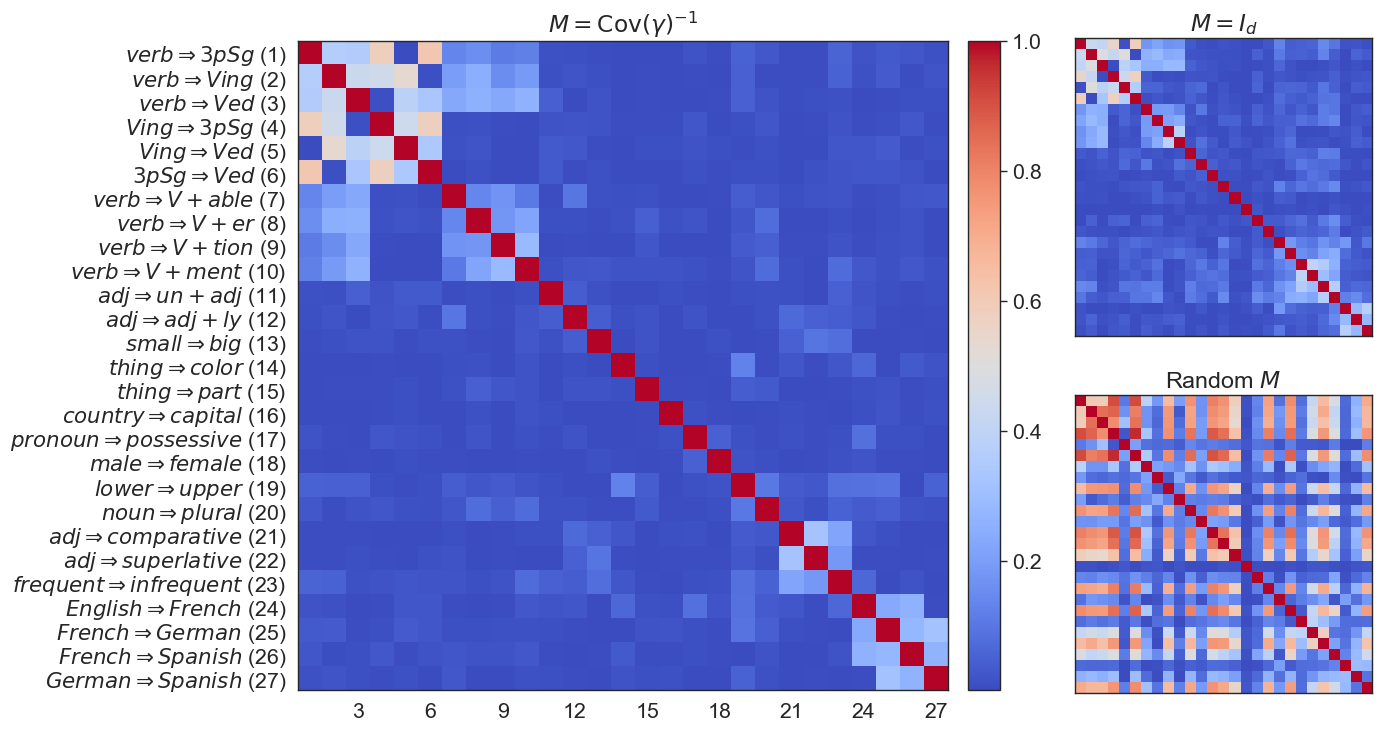

In [ ]:
lrg.draw_heatmaps(
    [torch.abs(g_cosines).cpu().numpy(),
    torch.abs(gamma_cosines).cpu().numpy(),
    torch.abs(another_g_cosines).cpu().numpy()],
    concept_labels = concept_names,
    cmap = "coolwarm"
)